In [1]:
import keras
import tensorflow
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [2]:
print(f'Keras version:- {keras.__version__}')
print(f'Tensorflow version:- {tensorflow.__version__}')

Keras version:- 2.3.1
Tensorflow version:- 2.2.0


In [3]:
train_data_path = r'C:\Users\Sameer\OneDrive\Desktop\Mask Detection\dataset\train'
validation_data_path = r'C:\Users\Sameer\OneDrive\Desktop\Mask Detection\dataset\valid'

In [4]:
#Show sugmented images
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
train_data = train_datagen.flow_from_directory(train_data_path, target_size=(200, 200), batch_size=128, class_mode='binary')
train_data.class_indices

Found 3649 images belonging to 2 classes.


{'with_mask': 0, 'without_mask': 1}

In [6]:
valid_datagen = ImageDataGenerator(rescale=1./255)
valid_data = valid_datagen.flow_from_directory(validation_data_path, target_size=(200, 200), batch_size=128, class_mode='binary')
valid_data.class_indices

Found 806 images belonging to 2 classes.


{'with_mask': 0, 'without_mask': 1}

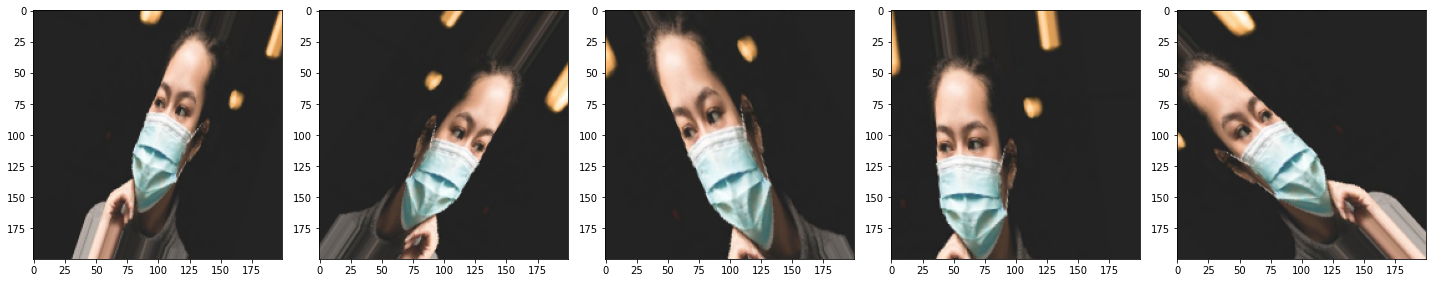

In [7]:
images = [train_data[0][0][0] for i in range(5)]
plot_images(images)

In [8]:
# Save the model using valscore
model_path = r'C:\Users\Sameer\OneDrive\Desktop\Mask Detection\model.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [9]:
# Building the model
cnn_model = keras.models.Sequential([keras.layers.Conv2D(filters=32, kernel_size=5, input_shape=[200, 200, 3]),
                                     keras.layers.MaxPooling2D(pool_size=(4, 4)),
                                     keras.layers.Conv2D(filters=64, kernel_size=4),
                                     keras.layers.MaxPooling2D(pool_size=(3, 3)),
                                     keras.layers.Conv2D(filters=128, kernel_size=3),
                                     keras.layers.MaxPooling2D(pool_size=(2, 2)),
                                     keras.layers.Conv2D(filters=256, kernel_size=2),
                                     keras.layers.MaxPooling2D(pool_size=(2, 2)),
                                     keras.layers.Dropout(0.5),
                                     keras.layers.Flatten(),
                                     keras.layers.Dense(units=128, activation='relu'), #Input layer
                                     keras.layers.Dropout(0.1),
                                     keras.layers.Dense(units=256, activation='relu'),
                                     keras.layers.Dropout(0.25),
                                     keras.layers.Dense(units=2, activation='softmax'), #Output layer
                                    ])

In [10]:
# Compile the model
cnn_model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# cnn_model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Train the model
# history = cnn_model.fit(train_data, epochs=50, verbose=1, validation_data=valid_data, callbacks=callbacks_list)

In [12]:
cnn_model.save(r'C:\Users\Sameer\OneDrive\Desktop\Mask Detection\model.h5')

In [13]:
# # Plot the loss
# plt.plot(cnn_model.history['loss'], label='Training loss')
# plt.plot(cnn_model.history['val_loss'], label='Validation loss')
# plt.legend()
# plt.show()
# # plt.savefig('Loss/Validation loss')

In [14]:
# # Plot the accuracy
# plt.plot(cnn_model.history['accuracy'], label='Training accuracy')
# plt.plot(cnn_model.history['val_accuracy'], label='Validation accuracy')
# plt.legend()
# plt.show()
# # plt.savefig('Accuracy value')